In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel('input.xlsx')
df

,Input,Change,Gain,Loss,Avg Gain,Avg Loss,HM,14-day HMA
0,44.3389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44.0902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44.1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43.6124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,44.3278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,44.8264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,45.0955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,45.4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,45.8433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,46.0826,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#1st Approch

In [2]:
# # Calculate 'Change', 'Gain', and 'Loss'
# df['Change'] = df['Input'].diff()
# df['Gain'] = np.where(df['Change'] > 0, df['Change'], 0)
# df['Loss '] = np.where(df['Change'] < 0, -df['Change'], 0)

# # Handle the specific case for the 14th row for 'Avg Gain' and 'Avg Loss'
# df.loc[14, 'Avg Gain'] = df['Gain'].iloc[1:15].mean()
# df.loc[14, 'Avg Loss'] = df['Loss '].iloc[1:15].mean()

# # Calculate 'Avg Gain' and 'Avg Loss' using rolling mean for the rest of the rows
# for index in range(15, len(df)):
#     df.at[index, 'Avg Gain'] = ((df.at[index - 1, 'Avg Gain'] * 13) + df.at[index, 'Gain']) / 14
#     df.at[index, 'Avg Loss'] = ((df.at[index - 1, 'Avg Loss'] * 13) + df.at[index, 'Loss ']) / 14

# # Calculate 'HM', '14-day HMA', and fill NaN values with 0
# df['HM'] = df['Avg Gain'] / df['Avg Loss']
# df['14-day HMA'] = np.where(df['Avg Loss'] == 0, 100, 100 - (100 / (1 + df['HM'])))

# # Round the entire DataFrame to 2 decimal places
# df = df.fillna(0).round(2)

# df


#2nd Approch

In [3]:
for index,row in df.iterrows():
    try:
        if index == 0:
            pass
        else:
            df.at[index,'Change'] = row['Input'] - df.at[index - 1,'Input']
            row['Gain'] = np.where(row['Change'] > 0, row['Change'], 0)
            row['Loss '] = np.where(row['Change'] < 0, -row['Change'], 0)
            if index == 14:
                row['Avg Gain'] = df['Gain'].iloc[1:15].mean()
                row['Avg Loss'] = df['Loss '].iloc[1:15].mean()
                row['HM'] = row['Avg Gain'] / row['Avg Loss']
                row['14-day HMA'] = np.where(row['Avg Loss'] == 0,100,100 - (100 / (1 + row['HM'])))
            else:
                df.at[index,'Avg Gain'] = ((df.at[index -1 ,'Avg Gain'] * 13) + df.at[index,'Gain']) / 14
                df.at[index,'Avg Loss'] = ((df.at[index -1 ,'Avg Loss'] * 13) + df.at[index,'Loss ']) / 14
                row['HM'] = row['Avg Gain'] / row['Avg Loss']
                row['14-day HMA'] = np.where(row['Avg Loss'] == 0,100,100 - (100 / (1 + row['HM'])))
    except Exception as e:
        print(e)
        print(index)
    
df = df.fillna(0)
df = df.round(2)
df

,Input,Change,Gain,Loss,Avg Gain,Avg Loss,HM,14-day HMA
0,44.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,44.09,-0.25,0.00,0.25,0.00,0.00,0.00,0.00
2,44.15,0.06,0.06,0.00,0.00,0.00,0.00,0.00
3,43.61,-0.54,0.00,0.54,0.00,0.00,0.00,0.00
4,44.33,0.72,0.72,0.00,0.00,0.00,0.00,0.00
5,44.83,0.50,0.50,0.00,0.00,0.00,0.00,0.00
6,45.10,0.27,0.27,0.00,0.00,0.00,0.00,0.00
7,45.42,0.33,0.33,0.00,0.00,0.00,0.00,0.00
8,45.84,0.42,0.42,0.00,0.00,0.00,0.00,0.00
9,46.08,0.24,0.24,0.00,0.00,0.00,0.00,0.00


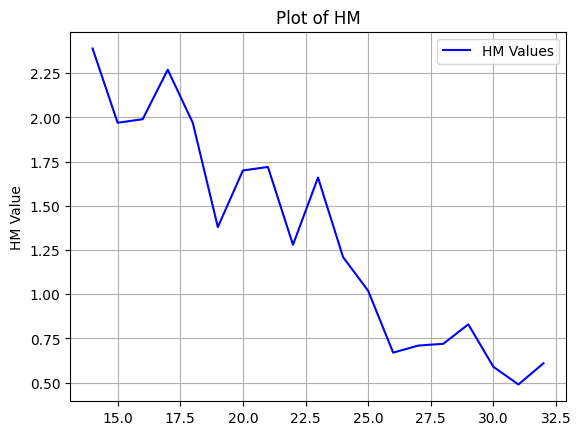

In [4]:
# Plot 'HM' starting from index 14 with blue color and a solid line
df['HM'][14:].plot(color='blue', linestyle='-', label='HM Values')

# Set title and labels
plt.title('Plot of HM')
plt.ylabel('HM Value')

# Add a grid for better readability
plt.grid(True)

# Show a legend
plt.legend()

# Show the plot
plt.show()

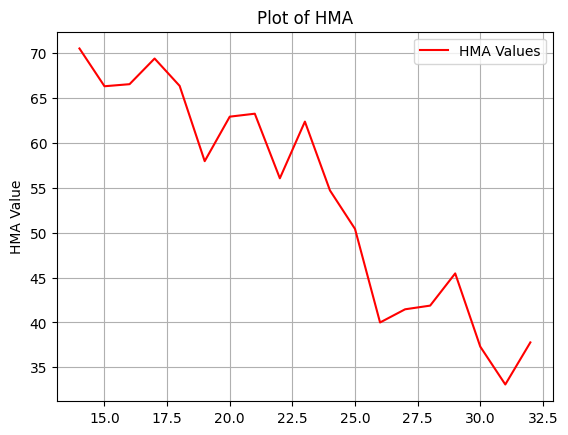

In [5]:
# Plot 'HM' starting from index 14 with blue color and a solid line
df['14-day HMA'][14:].plot(color='red', linestyle='-', label='HMA Values')

# Set title and labels
plt.title('Plot of HMA')
plt.ylabel('HMA Value')

# Add a grid for better readability
plt.grid(True)

# Show a legend
plt.legend()

# Show the plot
plt.show()